In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sqlalchemy import inspect, create_engine

# from sqlalchemy import create_engine
# engine = create_engine('postgresql://localhost:5432/<your_db_name>')
# connection = engine.connect()


In [2]:
#like Booths example
#https://stackoverflow.com/questions/9353822/connecting-postgresql-with-sqlalchemy/42587012#42587012
HOSTNAME = "localhost"
PORT = 5432
DATABASE = "Week9_Homework"
USERNAME = "postgres"
PASSWORD = "1234"

path = f'postgresql+psycopg2://{USERNAME}:{PASSWORD}@{HOSTNAME}:{PORT}/{DATABASE}'
engine = create_engine(path)
#print(path)

In [3]:
# verify above worked
inspector = inspect(engine)

for table in inspector.get_table_names():
    columns = inspector.get_columns(table)
    print(table)
    #space
    print()
    for column in columns:
        print(column["name"], column["type"])
    
    # or put it as a dataframe
    display(pd.DataFrame(columns))
    
    print()

titles

title_id VARCHAR(10)
title VARCHAR(50)
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,title_id,VARCHAR(10),False,None,False,None
1,title,VARCHAR(50),False,None,False,None
2,last_updated,TIMESTAMP,False,LOCALTIMESTAMP,False,None



employees

emp_no INTEGER
emp_title_id VARCHAR(10)
birth_date DATE
first_name VARCHAR(50)
last_name VARCHAR(50)
sex VARCHAR(2)
hire_date DATE
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,emp_no,INTEGER,False,None,False,None
1,emp_title_id,VARCHAR(10),False,None,False,None
2,birth_date,DATE,False,None,False,None
3,first_name,VARCHAR(50),False,None,False,None
4,last_name,VARCHAR(50),False,None,False,None
5,sex,VARCHAR(2),False,None,False,None
6,hire_date,DATE,False,None,False,None
7,last_updated,TIMESTAMP,False,LOCALTIMESTAMP,False,None



departments

dept_no VARCHAR(10)
dept_name VARCHAR(50)
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,dept_no,VARCHAR(10),False,None,False,None
1,dept_name,VARCHAR(50),False,None,False,None
2,last_updated,TIMESTAMP,False,LOCALTIMESTAMP,False,None



dept_manager

ID INTEGER
dept_no VARCHAR(10)
emp_no INTEGER
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""dept_manager_ID_seq""'::regclass)",True,None
1,dept_no,VARCHAR(10),False,None,False,None
2,emp_no,INTEGER,False,None,False,None
3,last_updated,TIMESTAMP,False,LOCALTIMESTAMP,False,None



salaries

ID INTEGER
emp_no INTEGER
salary INTEGER
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""salaries_ID_seq""'::regclass)",True,None
1,emp_no,INTEGER,False,None,False,None
2,salary,INTEGER,False,None,False,None
3,last_updated,TIMESTAMP,False,LOCALTIMESTAMP,False,None



dept_emp

ID INTEGER
emp_no INTEGER
dept_no VARCHAR(10)
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""dept_emp_ID_seq""'::regclass)",True,None
1,emp_no,INTEGER,False,None,False,None
2,dept_no,VARCHAR(10),False,None,False,None
3,last_updated,TIMESTAMP,False,LOCALTIMESTAMP,False,None


In [4]:
#Create a bar chart of average salary by title.

#create query first

query = """
        SELECT
            titles.title,
            avg(salaries.salary) as avg_salary
        FROM
            employees
        JOIN 
            salaries on employees.emp_no = salaries.emp_no
        JOIN 
            titles on employees.emp_title_id = titles.title_id
        GROUP BY
            titles.title
        order by
            avg_salary desc
        """

conn = engine.connect()

avgsalary_df = pd.read_sql(query, conn)
avgsalary_df.head()

,title,avg_salary
0,Senior Staff,58550.172704
1,Staff,58465.382850
2,Manager,51531.041667
3,Technique Leader,48582.896092
4,Assistant Engineer,48564.434447


In [5]:
avgsalary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       7 non-null      object 
 1   avg_salary  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


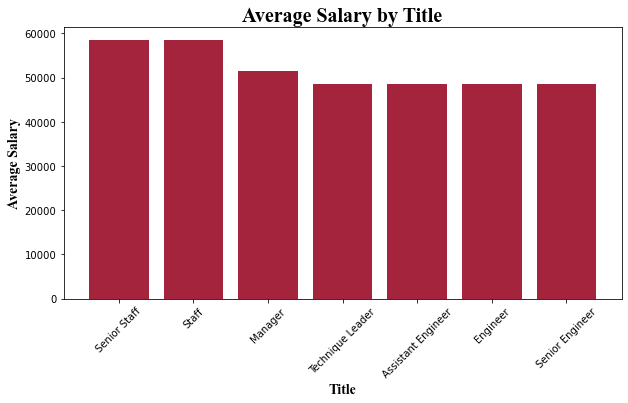

In [6]:
#create barchart

#make my bar graph look nice, color, titles, etc
plt.figure(figsize=(10,5))
plt.bar(avgsalary_df.title, avgsalary_df.avg_salary, color = "#A5243D" )
plt.xlabel("Title",fontsize = 14,fontweight = "bold", fontname="Times New Roman")
plt.ylabel("Average Salary",fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title("Average Salary by Title",fontsize = 20, fontweight = "bold",fontname="Times New Roman")
plt.xticks(rotation=45)
plt.show()

In [7]:
#Create a histogram to visualize the most common salary ranges for employees.

In [8]:

query2 = """
        SELECT
            *
        FROM
            salaries
        """

conn = engine.connect()

salary_df = pd.read_sql(query2, conn)
salary_df.head()

,ID,emp_no,salary,last_updated
0,1,10001,60117,2022-02-25 23:05:13.254789
1,2,10002,65828,2022-02-25 23:05:13.254789
2,3,10003,40006,2022-02-25 23:05:13.254789
3,4,10004,40054,2022-02-25 23:05:13.254789
4,5,10005,78228,2022-02-25 23:05:13.254789


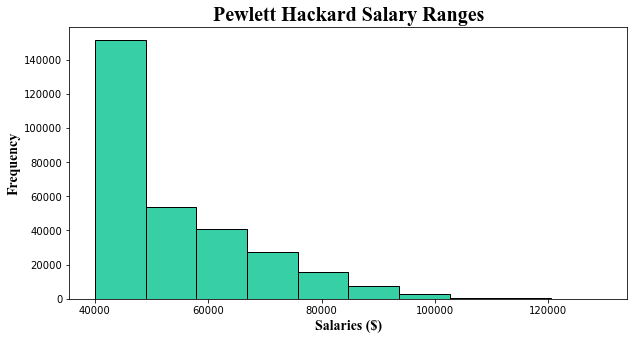

In [10]:
#historgram
plt.figure(figsize=(10,5))
plt.hist(salary_df['salary'],bins=10,color='#36CFA6',edgecolor='black')
plt.title('Pewlett Hackard Salary Ranges',fontsize = 20, fontweight = "bold",fontname="Times New Roman")
plt.xlabel('Salaries ($)',fontsize = 14,fontweight = "bold", fontname="Times New Roman")
plt.ylabel('Frequency',fontsize = 14,fontweight = "bold", fontname="Times New Roman")
plt.show()

In [ ]:
conn.close()
engine.dispose()

In [ ]:
# Evidence in hand, you march into your boss's office and present the visualization. With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, "Search your ID number." You look down at your badge to see that your employee ID number is 499942.

In [ ]:

query3 = """
        SELECT
            *
        FROM
            employees
        WHERE
            emp_no=499942 
        """

conn = engine.connect()

epilogue_df = pd.read_sql(query3, conn)
epilogue_df.head()

In [ ]:
#April Foolsday is my name 

In [ ]:
conn.close()
engine.dispose()